In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.backend import one_hot

#from keras.utils.np_utils import to_categorical

In [3]:
os.listdir('TTV')

['Test',
 'Validate',
 'DATA.csv',
 'TRAIN.csv',
 'TEST.csv',
 'VALIDATE.csv',
 'Train']

In [4]:
lab1_arr = np.load('lab1_arr.npy')
lab2_arr = np.load('lab2_arr.npy')

In [5]:
train_features = np.load('train_features_s.npy'); # this should load all the data sets
test_features = np.load('test_features_s.npy');
validate_features = np.load('validate_features_s.npy');
train_l1= np.load('train_l1.npy'); # l1 l2 such are one hot encoded
train_l2= np.load('train_l2.npy');
validate_l1= np.load('validate_l1.npy');
validate_l2= np.load('validate_l2.npy');
test_l2= np.load('test_l2.npy');
test_l1= np.load('test_l1.npy'); 

In [5]:
train_features_z = np.load('train_features_z.npy'); 
test_features_z = np.load('test_features_z.npy');
validate_features_z = np.load('validate_features_z.npy');

In [6]:
test_features_z.shape

(10700, 31015)

In [7]:
train_features[0].shape

(31015,)

In [8]:
def model1():
    model = tf.keras.Sequential([tf.keras.layers.Dense(32,activation='relu',input_shape=(31015,),name='d1_32'),
                                tf.keras.layers.Dense(64,activation='relu',name='d2_64',kernel_regularizer = 'l2'),
                                tf.keras.layers.Dense(64,activation='relu',name='d3_64',kernel_regularizer='l2'),
                                tf.keras.layers.Dense(198,activation='softmax',name='output')
                                ],name='Model_1')
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    model.summary()
    
    return model

In [9]:
m101 = model1()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_32 (Dense)                (None, 32)                992512    
_________________________________________________________________
d2_64 (Dense)                (None, 64)                2112      
_________________________________________________________________
d3_64 (Dense)                (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 198)               12870     
Total params: 1,011,654
Trainable params: 1,011,654
Non-trainable params: 0
_________________________________________________________________


In [10]:
train_features.shape # that is each entry has 31015 features ...... 

(32021, 31015)

In [11]:
np.isnan(train_features).any()

True

In [12]:
np.argwhere(np.isnan(train_features))

array([[    0,  2874],
       [    0,  6671],
       [    0, 19625],
       ...,
       [32020,  6671],
       [32020, 19625],
       [32020, 25099]])

In [13]:
train_features[0,63]

0.0

In [6]:
train_features = np.nan_to_num(train_features)
test_features = np.nan_to_num(test_features)
validate_features = np.nan_to_num(validate_features)

In [15]:
train_features_z = np.nan_to_num(train_features_z)
test_features_z = np.nan_to_num(test_features_z)
validate_features_z = np.nan_to_num(validate_features_z)

In [16]:
np.isnan(train_features).any()

False

In [17]:
train_l2.shape

(32021, 22)

In [18]:
train_features.shape

(32021, 31015)

In [19]:
h101 = m101.fit(train_features_z,train_l1,epochs=50,validation_data=(validate_features_z,validate_l1),verbose=2)

Epoch 1/50
1001/1001 - 69s - loss: 1.3006 - accuracy: 0.8513 - val_loss: 0.5697 - val_accuracy: 0.9537
Epoch 2/50
1001/1001 - 63s - loss: 0.3181 - accuracy: 0.9835 - val_loss: 0.3902 - val_accuracy: 0.9637
Epoch 3/50
1001/1001 - 63s - loss: 0.1805 - accuracy: 0.9912 - val_loss: 0.3263 - val_accuracy: 0.9676
Epoch 4/50
1001/1001 - 61s - loss: 0.1334 - accuracy: 0.9930 - val_loss: 0.2893 - val_accuracy: 0.9676
Epoch 5/50
1001/1001 - 62s - loss: 0.1128 - accuracy: 0.9932 - val_loss: 0.2734 - val_accuracy: 0.9635
Epoch 6/50
1001/1001 - 64s - loss: 0.0987 - accuracy: 0.9932 - val_loss: 0.2711 - val_accuracy: 0.9592
Epoch 7/50
1001/1001 - 63s - loss: 0.0863 - accuracy: 0.9941 - val_loss: 0.2254 - val_accuracy: 0.9693
Epoch 8/50
1001/1001 - 62s - loss: 0.0775 - accuracy: 0.9943 - val_loss: 0.2201 - val_accuracy: 0.9654
Epoch 9/50
1001/1001 - 62s - loss: 0.0738 - accuracy: 0.9942 - val_loss: 0.2026 - val_accuracy: 0.9652
Epoch 10/50
1001/1001 - 61s - loss: 0.0724 - accuracy: 0.9941 - val_loss:

In [22]:
def plot_model(history,figname='output1'):
    acc = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(len(acc))

    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    plt.plot(epochs,acc,'r',label = 'Training Accuracy')
    plt.plot(epochs,val_acc,'b',label = ' Validation Accuracy')
    plt.xlabel('Epochs');plt.ylabel('Accuracy');
    #plt.title('Accuracy')
    plt.legend() 
    #plt.figure()
    plt.savefig(figname+'_accuracy.png')
    plt.show()

    plt.plot(epochs,loss,'r',label = 'Training Loss')
    plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
    plt.xlabel('Epochs');plt.ylabel('Loss');
    #plt.title('Loss')
    plt.legend()
    plt.savefig(figname+'_loss.png')
    plt.show()

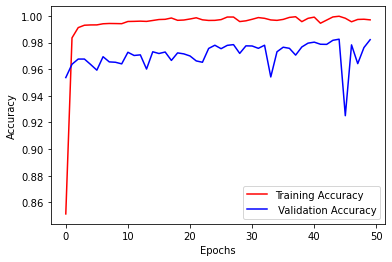

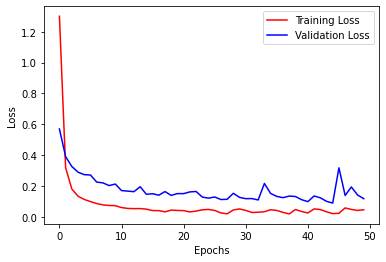

In [21]:
plot_model(h101,figname='Trial 01')

In [22]:
test_features_z.shape

(10700, 31015)

In [23]:
r101 = m101.evaluate(test_features_z, test_l1)

335/335 [==============================] - 14s 43ms/step - loss: 0.1089 - accuracy: 0.9840


In [24]:
m102 = model1()


Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_32 (Dense)                (None, 32)                992512    
_________________________________________________________________
d2_64 (Dense)                (None, 64)                2112      
_________________________________________________________________
d3_64 (Dense)                (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 198)               12870     
Total params: 1,011,654
Trainable params: 1,011,654
Non-trainable params: 0
_________________________________________________________________


In [25]:
h102 = m102.fit(train_features,train_l1,epochs=50,validation_data=(validate_features,validate_l1),verbose=2)

Epoch 1/50
1001/1001 - 81s - loss: 2.5232 - accuracy: 0.5178 - val_loss: 0.9825 - val_accuracy: 0.8632
Epoch 2/50
1001/1001 - 64s - loss: 0.6919 - accuracy: 0.9384 - val_loss: 0.6597 - val_accuracy: 0.9276
Epoch 3/50
1001/1001 - 58s - loss: 0.4407 - accuracy: 0.9875 - val_loss: 0.4836 - val_accuracy: 0.9607
Epoch 4/50
1001/1001 - 63s - loss: 0.3291 - accuracy: 0.9969 - val_loss: 0.3999 - val_accuracy: 0.9652
Epoch 5/50
1001/1001 - 60s - loss: 0.2619 - accuracy: 0.9984 - val_loss: 0.3451 - val_accuracy: 0.9678
Epoch 6/50
1001/1001 - 62s - loss: 0.2126 - accuracy: 0.9993 - val_loss: 0.3628 - val_accuracy: 0.9472
Epoch 7/50
1001/1001 - 60s - loss: 0.1789 - accuracy: 0.9992 - val_loss: 0.2778 - val_accuracy: 0.9688
Epoch 8/50
1001/1001 - 61s - loss: 0.1516 - accuracy: 0.9995 - val_loss: 0.2283 - val_accuracy: 0.9758
Epoch 9/50
1001/1001 - 61s - loss: 0.1297 - accuracy: 0.9998 - val_loss: 0.2276 - val_accuracy: 0.9691
Epoch 10/50
1001/1001 - 62s - loss: 0.1216 - accuracy: 0.9976 - val_loss:

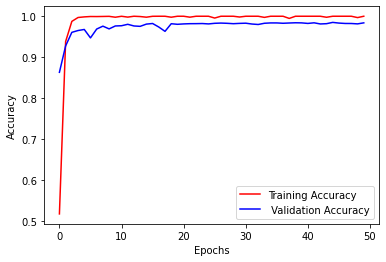

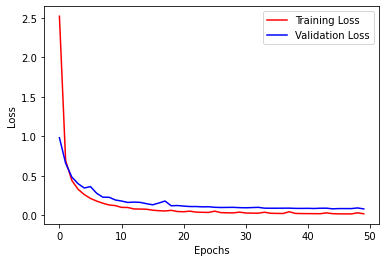

In [26]:
plot_model(h102,figname='Trial 02')

In [27]:
r102 = m102.evaluate(test_features, test_l1)

335/335 [==============================] - 12s 37ms/step - loss: 0.0747 - accuracy: 0.9857


In [28]:
m1 = model1()


Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_32 (Dense)                (None, 32)                992512    
_________________________________________________________________
d2_64 (Dense)                (None, 64)                2112      
_________________________________________________________________
d3_64 (Dense)                (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 198)               12870     
Total params: 1,011,654
Trainable params: 1,011,654
Non-trainable params: 0
_________________________________________________________________


In [29]:
h1 = m1.fit(train_features,train_l1,epochs=30,validation_data=(validate_features,validate_l1),verbose=2)

Epoch 1/30
1001/1001 - 69s - loss: 2.4304 - accuracy: 0.5550 - val_loss: 0.9283 - val_accuracy: 0.8888
Epoch 2/30
1001/1001 - 63s - loss: 0.6515 - accuracy: 0.9576 - val_loss: 0.6399 - val_accuracy: 0.9444
Epoch 3/30
1001/1001 - 63s - loss: 0.4251 - accuracy: 0.9917 - val_loss: 0.4889 - val_accuracy: 0.9583
Epoch 4/30
1001/1001 - 65s - loss: 0.3187 - accuracy: 0.9973 - val_loss: 0.3685 - val_accuracy: 0.9732
Epoch 5/30
1001/1001 - 66s - loss: 0.2514 - accuracy: 0.9985 - val_loss: 0.3103 - val_accuracy: 0.9767
Epoch 6/30
1001/1001 - 64s - loss: 0.2033 - accuracy: 0.9997 - val_loss: 0.2757 - val_accuracy: 0.9754
Epoch 7/30
1001/1001 - 63s - loss: 0.1684 - accuracy: 0.9995 - val_loss: 0.2340 - val_accuracy: 0.9806
Epoch 8/30
1001/1001 - 61s - loss: 0.1455 - accuracy: 0.9992 - val_loss: 0.1967 - val_accuracy: 0.9846
Epoch 9/30
1001/1001 - 63s - loss: 0.1199 - accuracy: 1.0000 - val_loss: 0.1903 - val_accuracy: 0.9817
Epoch 10/30
1001/1001 - 63s - loss: 0.1101 - accuracy: 0.9990 - val_loss:

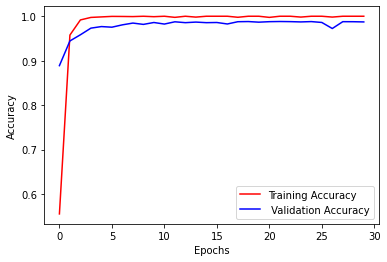

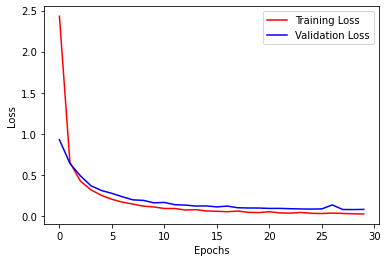

In [30]:
plot_model(h1,figname='Model1')

In [55]:
r1 = m1.evaluate(test_features, test_l1)

335/335 [==============================] - 14s 41ms/step - loss: 0.0758 - accuracy: 0.9874


In [16]:
def model2():
    model = tf.keras.Sequential([tf.keras.layers.Dense(32,activation='relu',input_shape=(31015,),name='d1_32'),
                                tf.keras.layers.Dense(64,activation='relu',name='d2_64',kernel_regularizer = 'l2'),
                                tf.keras.layers.Dropout(0.2,name='Dropout1_0.2'),
                                tf.keras.layers.Dense(64,activation='relu',name='d3_64',kernel_regularizer='l2'),
                                tf.keras.layers.Dropout(0.2,name='Dropout2_0.2'),
                                tf.keras.layers.Dense(198,activation='softmax',name='output')
                                ],name='Model_2')
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    model.summary()
    
    return model

In [33]:
m2 = model2()

Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_32 (Dense)                (None, 32)                992512    
_________________________________________________________________
d2_64 (Dense)                (None, 64)                2112      
_________________________________________________________________
Dropout1_0.2 (Dropout)       (None, 64)                0         
_________________________________________________________________
d3_64 (Dense)                (None, 64)                4160      
_________________________________________________________________
Dropout2_0.2 (Dropout)       (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 198)               12870     
Total params: 1,011,654
Trainable params: 1,011,654
Non-trainable params: 0
_________________________________________________

In [ ]:
h2 = m2.fit(train_features,train_l1,epochs=30,validation_data=(validate_features,validate_l1),verbose=2)

Epoch 1/30
1001/1001 - 71s - loss: 3.5997 - accuracy: 0.2125 - val_loss: 1.9557 - val_accuracy: 0.5338
Epoch 2/30
1001/1001 - 68s - loss: 1.9330 - accuracy: 0.4947 - val_loss: 1.2664 - val_accuracy: 0.7259
Epoch 3/30
1001/1001 - 66s - loss: 1.4244 - accuracy: 0.6352 - val_loss: 0.9383 - val_accuracy: 0.8273
Epoch 4/30
1001/1001 - 64s - loss: 1.1077 - accuracy: 0.7440 - val_loss: 0.7807 - val_accuracy: 0.8705
Epoch 5/30
1001/1001 - 64s - loss: 0.8995 - accuracy: 0.8093 - val_loss: 0.6464 - val_accuracy: 0.9096
Epoch 6/30
1001/1001 - 63s - loss: 0.7770 - accuracy: 0.8477 - val_loss: 0.6033 - val_accuracy: 0.9122
Epoch 7/30
1001/1001 - 65s - loss: 0.6784 - accuracy: 0.8742 - val_loss: 0.5475 - val_accuracy: 0.9251
Epoch 8/30
1001/1001 - 62s - loss: 0.6232 - accuracy: 0.8879 - val_loss: 0.5109 - val_accuracy: 0.9284
Epoch 9/30
1001/1001 - 63s - loss: 0.5723 - accuracy: 0.9013 - val_loss: 0.5110 - val_accuracy: 0.9236
Epoch 10/30
1001/1001 - 62s - loss: 0.5402 - accuracy: 0.9070 - val_loss:

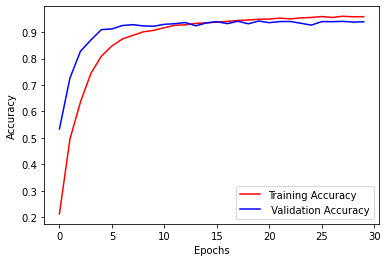

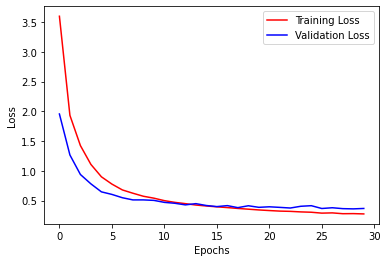

In [48]:
plot_model(h2,figname='Model2')

In [54]:
r2 = m2.evaluate(test_features, test_l1)

335/335 [==============================] - 14s 42ms/step - loss: 0.3440 - accuracy: 0.9412


In [ ]:
def model3():
    model = tf.keras.Sequential([tf.keras.layers.Dense(32,activation='relu',input_shape=(31015,),name='d1_32'),
                                tf.keras.layers.Dense(64,activation='relu',name='d2_64',kernel_regularizer = 'l2'),
                                tf.keras.layers.Dropout(0.2,name='Dropout1_0.2'),
                                tf.keras.layers.Dense(128,activation='relu',name='d3_64',kernel_regularizer='l2'),
                                tf.keras.layers.Dropout(0.2,name='Dropout2_0.2'),
                                tf.keras.layers.Dense(64,activation='relu',name='d4_64',kernel_regularizer='l2'),
                                tf.keras.layers.Dropout(0.2,name='Dropout3_0.2'),
                                tf.keras.layers.Dense(198,activation='softmax',name='output')
                                ],name='Model_3')
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    model.summary()
    
    return model

In [57]:
m3 = model3()

Model: "Model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_32 (Dense)                (None, 32)                992512    
_________________________________________________________________
d2_64 (Dense)                (None, 64)                2112      
_________________________________________________________________
Dropout1_0.2 (Dropout)       (None, 64)                0         
_________________________________________________________________
d3_64 (Dense)                (None, 128)               8320      
_________________________________________________________________
Dropout2_0.2 (Dropout)       (None, 128)               0         
_________________________________________________________________
d4_64 (Dense)                (None, 64)                8256      
_________________________________________________________________
Dropout3_0.2 (Dropout)       (None, 64)                0   

In [58]:
h3 = m3.fit(train_features,train_l1,epochs=30,validation_data=(validate_features,validate_l1),verbose=2)

MemoryError: Unable to allocate 3.70 GiB for an array with shape (32021, 31015) and data type float32

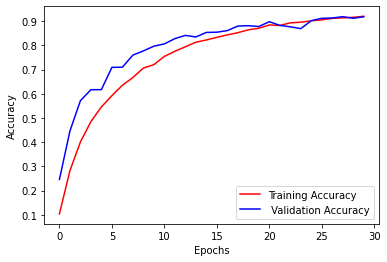

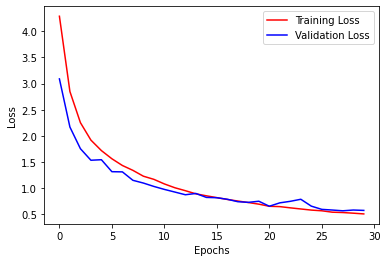

In [59]:
plot_model(h3,figname='Model3')

In [53]:
r3 = m3.evaluate(test_features, test_l1)

335/335 [==============================] - 14s 42ms/step - loss: 7.4174 - accuracy: 0.0042


In [ ]:
def model4():
    model = tf.keras.Sequential([tf.keras.layers.Dense(32,activation='relu',input_shape=(31015,),name='d1_32'),
                                tf.keras.layers.Dense(64,activation='relu',name='d2_64',kernel_regularizer = 'l2'),
                                tf.keras.layers.Dense(128,activation='relu',name='d3_128',kernel_regularizer='l2'),
                                tf.keras.layers.Dense(64,activation='relu',name='d4_64',kernel_regularizer='l2'),
                                tf.keras.layers.Dense(198,activation='softmax',name='output')
                                ],name='Model_3')
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    model.summary()
    
    return model

In [ ]:
m4 = model4()

In [ ]:
h4 = m4.fit(train_features,train_l1,epochs=30,validation_data=(validate_features,validate_l1),verbose=2)

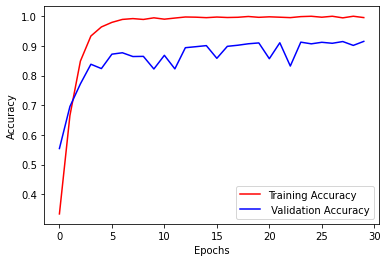

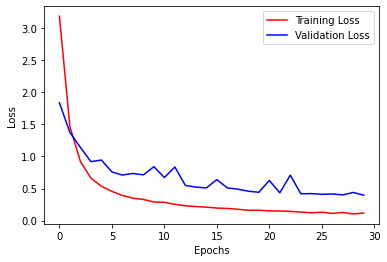

In [50]:
plot_model(h4,figname='Model4')

In [51]:
r4 = m4.evaluate(test_features, test_l1)

335/335 [==============================] - 13s 40ms/step - loss: 0.3908 - accuracy: 0.9154


In [12]:
def model2():
    model = tf.keras.Sequential([tf.keras.layers.Dense(32,activation='relu',input_shape=(31015,),name='d1_32'),
                                tf.keras.layers.Dense(64,activation='relu',name='d2_64',kernel_regularizer = 'l2'),
                                tf.keras.layers.Dropout(0.2,name='Drop 0.2'),
                                tf.keras.layers.Dense(64,activation='relu',name='d3_64',kernel_regularizer='l2'),
                                tf.keras.layers.Dropout(0.2,name='Drop 0.2'),
                                tf.keras.layers.Dense(198,activation='softmax',name='output')
                                ],name='Model 2')
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    model.summary()
    
    return model

In [ ]:
c1 = model2();c2 = model2();c3 = model2();c4=model2() ; c5 = model2() ; c6 = model2() ; c7 = model2();c8 = model2();

In [ ]:
k1 = c1.fit(train_features,train_l1,epochs=10,batch_size=16,validation_data=(validate_features,validate_l1),verbose=0)

In [ ]:
k2 = c2.fit(train_features,train_l1,epochs=10,batch_size=32,validation_data=(validate_features,validate_l1),verbose=0)

In [ ]:
k5 = c5.fit(train_features,train_l1,epochs=20,batch_size=32,validation_data=(validate_features,validate_l1),verbose=0)

In [ ]:
k6 = c6.fit(train_features,train_l1,epochs=20,batch_size=128,validation_data=(validate_features,validate_l1),verbose=0)

In [ ]:
k7 = c7.fit(train_features,train_l1,epochs=20,batch_size=512,validation_data=(validate_features,validate_l1),verbose=0)

In [ ]:
k8 = c8.fit(train_features,train_l1,epochs=25,batch_size=256,validation_data=(validate_features,validate_l1),verbose=0)

In [ ]:
k3 = c3.fit(train_features,train_l1,epochs=10,batch_size=256,validation_data=(validate_features,validate_l1),verbose=0)

In [ ]:
k4 = c4.fit(train_features,train_l1,epochs=10,batch_size=512,validation_data=(validate_features,validate_l1),verbose=0)

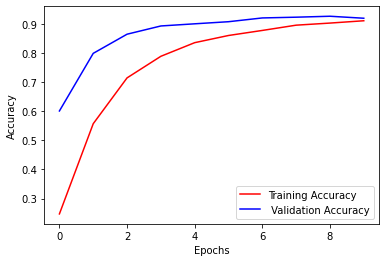

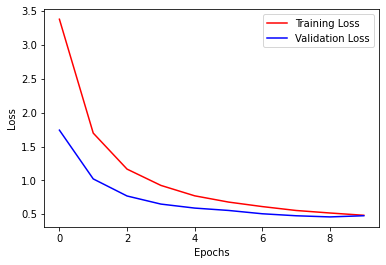

In [149]:
plot_model(k1,figname='c1')

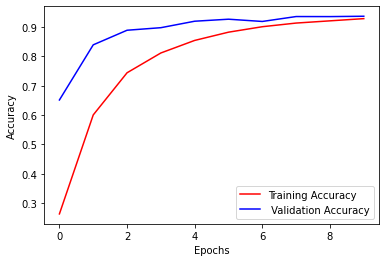

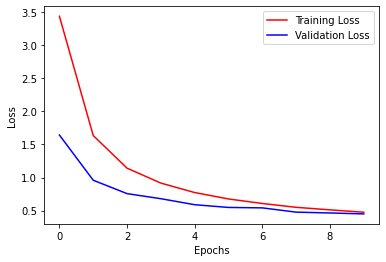

In [150]:
plot_model(k2,figname='c2')

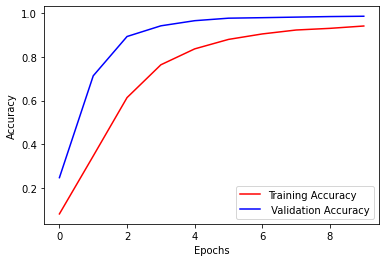

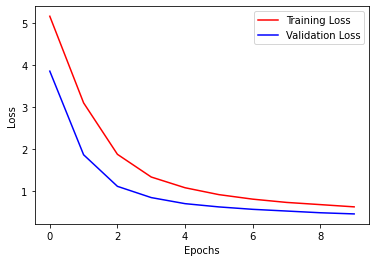

In [151]:
plot_model(k3,figname='c3')

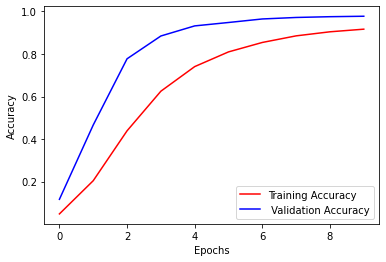

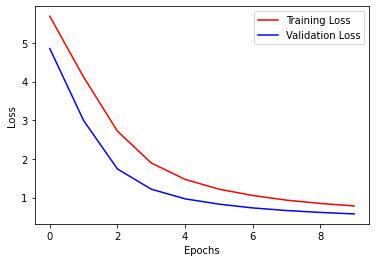

In [152]:
plot_model(k4,figname='c4')

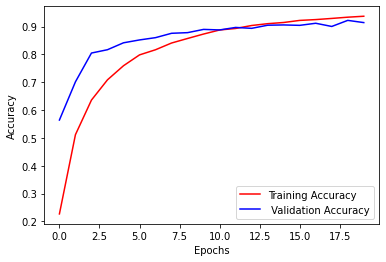

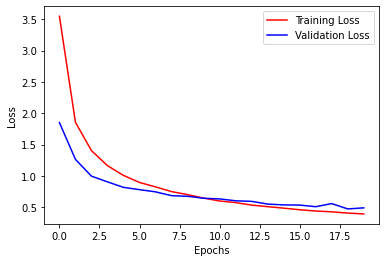

In [153]:
plot_model(k5,figname='c5')

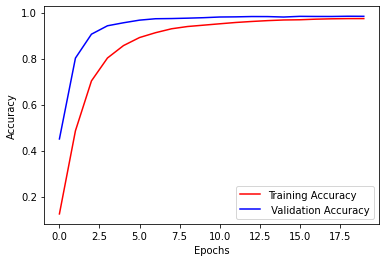

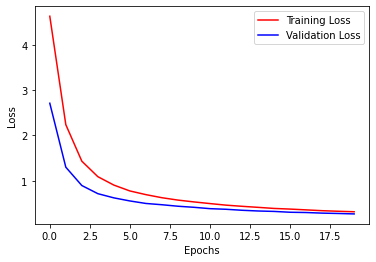

In [154]:
plot_model(k6,figname='c6')

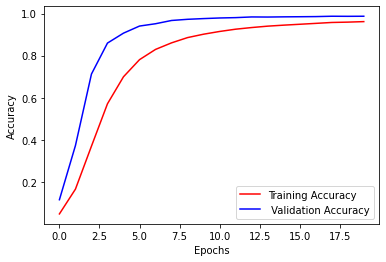

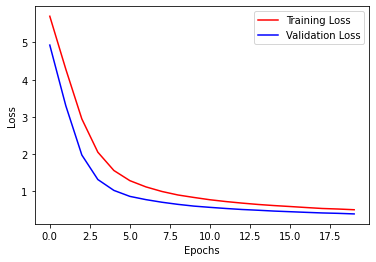

In [155]:
plot_model(k7,figname='c7')

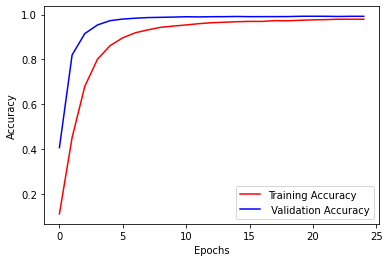

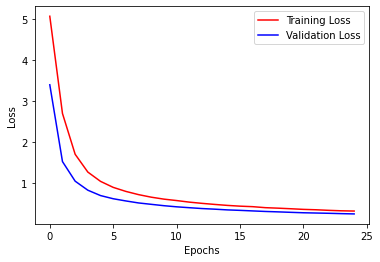

In [156]:
plot_model(k8,figname='c8')

In [17]:
def model2():
    model = tf.keras.Sequential([tf.keras.layers.Dense(32,activation='relu',input_shape=(31015,),name='d1_32'),
                                tf.keras.layers.Dense(64,activation='relu',name='d2_64',kernel_regularizer = 'l2'),
                                tf.keras.layers.Dropout(0.2,name='Dropout1_0.2'),
                                tf.keras.layers.Dense(64,activation='relu',name='d3_64',kernel_regularizer='l2'),
                                tf.keras.layers.Dropout(0.2,name='Dropout2_0.2'),
                                tf.keras.layers.Dense(198,activation='softmax',name='output')
                                ],name='Model_2')
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    model.summary()
    
    return model

In [168]:
a1 = c1.evaluate(test_features, test_l1)

335/335 [==============================] - 12s 35ms/step - loss: 0.4807 - accuracy: 0.9202


In [169]:
a2 = c2.evaluate(test_features, test_l1)

335/335 [==============================] - 11s 33ms/step - loss: 0.4634 - accuracy: 0.9328


In [170]:
a3 = c3.evaluate(test_features, test_l1)

335/335 [==============================] - 12s 36ms/step - loss: 0.4560 - accuracy: 0.9872


In [171]:
a4 = c4.evaluate(test_features, test_l1)

335/335 [==============================] - 10s 30ms/step - loss: 0.5817 - accuracy: 0.9796


In [172]:
a5 = c5.evaluate(test_features, test_l1)

335/335 [==============================] - 12s 34ms/step - loss: 0.4800 - accuracy: 0.9136


In [173]:
a6 = c6.evaluate(test_features, test_l1)

335/335 [==============================] - 12s 35ms/step - loss: 0.2729 - accuracy: 0.9836


In [174]:
a7 = c7.evaluate(test_features, test_l1)

335/335 [==============================] - 12s 35ms/step - loss: 0.3872 - accuracy: 0.9889


In [175]:
a8 = c8.evaluate(test_features, test_l1)

335/335 [==============================] - 13s 38ms/step - loss: 0.2391 - accuracy: 0.9936


In [177]:
#finalizing c6 as our model 

In [13]:
#os.mkdir('Checkpoints_ClineS');
#os.mkdir('Checkpoints_ClineS/model2/c6')

In [14]:
checkpoint_path = 'Checkpoints_ClineS/model2/c6/cp-{epoch:04d}.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True)

In [18]:
Cell_Line_predictor = model2()

Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1_32 (Dense)                (None, 32)                992512    
_________________________________________________________________
d2_64 (Dense)                (None, 64)                2112      
_________________________________________________________________
Dropout1_0.2 (Dropout)       (None, 64)                0         
_________________________________________________________________
d3_64 (Dense)                (None, 64)                4160      
_________________________________________________________________
Dropout2_0.2 (Dropout)       (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 198)               12870     
Total params: 1,011,654
Trainable params: 1,011,654
Non-trainable params: 0
_________________________________________________

In [19]:
history_cell_line = Cell_Line_predictor.fit(train_features,train_l1,epochs=20,batch_size=128,validation_data=(validate_features,validate_l1),verbose=2,callbacks=[cp_callback])

Epoch 1/20
251/251 - 24s - loss: 4.3941 - accuracy: 0.1893 - val_loss: 2.1113 - val_accuracy: 0.6484
Epoch 2/20
251/251 - 16s - loss: 1.8584 - accuracy: 0.6242 - val_loss: 0.9885 - val_accuracy: 0.9238
Epoch 3/20
251/251 - 15s - loss: 1.1642 - accuracy: 0.8142 - val_loss: 0.7048 - val_accuracy: 0.9669
Epoch 4/20
251/251 - 16s - loss: 0.9018 - accuracy: 0.8814 - val_loss: 0.5964 - val_accuracy: 0.9755
Epoch 5/20
251/251 - 16s - loss: 0.7520 - accuracy: 0.9147 - val_loss: 0.5241 - val_accuracy: 0.9801
Epoch 6/20
251/251 - 15s - loss: 0.6605 - accuracy: 0.9295 - val_loss: 0.4613 - val_accuracy: 0.9845
Epoch 7/20
251/251 - 15s - loss: 0.5843 - accuracy: 0.9437 - val_loss: 0.4260 - val_accuracy: 0.9833
Epoch 8/20
251/251 - 16s - loss: 0.5283 - accuracy: 0.9527 - val_loss: 0.3904 - val_accuracy: 0.9858
Epoch 9/20
251/251 - 15s - loss: 0.4876 - accuracy: 0.9581 - val_loss: 0.3594 - val_accuracy: 0.9880
Epoch 10/20
251/251 - 16s - loss: 0.4524 - accuracy: 0.9622 - val_loss: 0.3362 - val_accura

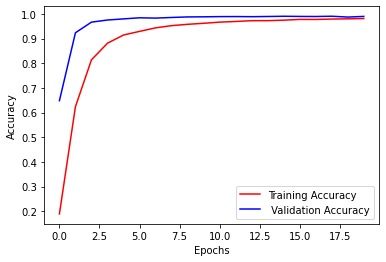

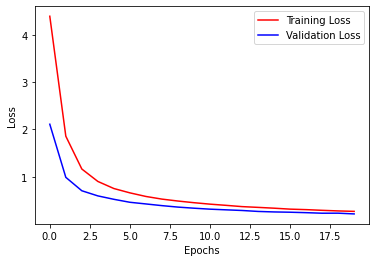

In [23]:
plot_model(history_cell_line,figname='Cell_Line_predictor')

In [24]:
Test_Cell_Line_predictor = Cell_Line_predictor.evaluate(test_features, test_l1)

335/335 [==============================] - 15s 44ms/step - loss: 0.2124 - accuracy: 0.9932
